In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data = tf.pad(train_data, [[0, 0], [2, 2], [2, 2]])
test_data = tf.pad(test_data, [[0, 0], [2, 2], [2, 2]])

train_data = tf.expand_dims(train_data, 3)
test_data = tf.expand_dims(test_data, 3)

train_data = tf.repeat(train_data, repeats=3, axis=3)
test_data = tf.repeat(test_data, repeats=3, axis=3)

x_val = train_data[-2000:,:,:,:]
x_train = train_data[:-2000,:,:,:]
y_val = train_labels[-2000:]
y_train = train_labels[:-2000]

2022-03-28 21:56:17.716568: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-28 21:56:17.736985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:d1:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-03-28 21:56:17.737012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-28 21:56:17.740456: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-28 21:56:17.740502: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-28 21:56:17.741968: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

In [5]:
# alexnet
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

2022-03-28 21:56:53.106519: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1425408000 exceeds 10% of free system memory.
2022-03-28 21:56:53.988159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-28 21:56:53.989719: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz


Epoch 1/40


2022-03-28 21:56:54.535543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-03-28 21:56:55.368709: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-03-28 21:56:56.380081: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-28 21:56:57.226482: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-28 21:56:57.260904: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


907/907 [==============================] - 35s 35ms/step - loss: 0.6425 - accuracy: 0.7591 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 2/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0923 - accuracy: 0.9756 - val_loss: 0.0593 - val_accuracy: 0.9855
Epoch 3/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0721 - accuracy: 0.9814 - val_loss: 0.0323 - val_accuracy: 0.9930
Epoch 4/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0571 - accuracy: 0.9850 - val_loss: 0.0523 - val_accuracy: 0.9890
Epoch 5/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0476 - accuracy: 0.9890 - val_loss: 0.0547 - val_accuracy: 0.9915
Epoch 6/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0484 - accuracy: 0.9881 - val_loss: 0.0459 - val_accuracy: 0.9930
Epoch 7/40
907/907 [==============================] - 31s 34ms/step - loss: 0.0358 - accuracy: 0.9914 - val_loss: 0.0601 - val_accuracy: 0.9875
Epo

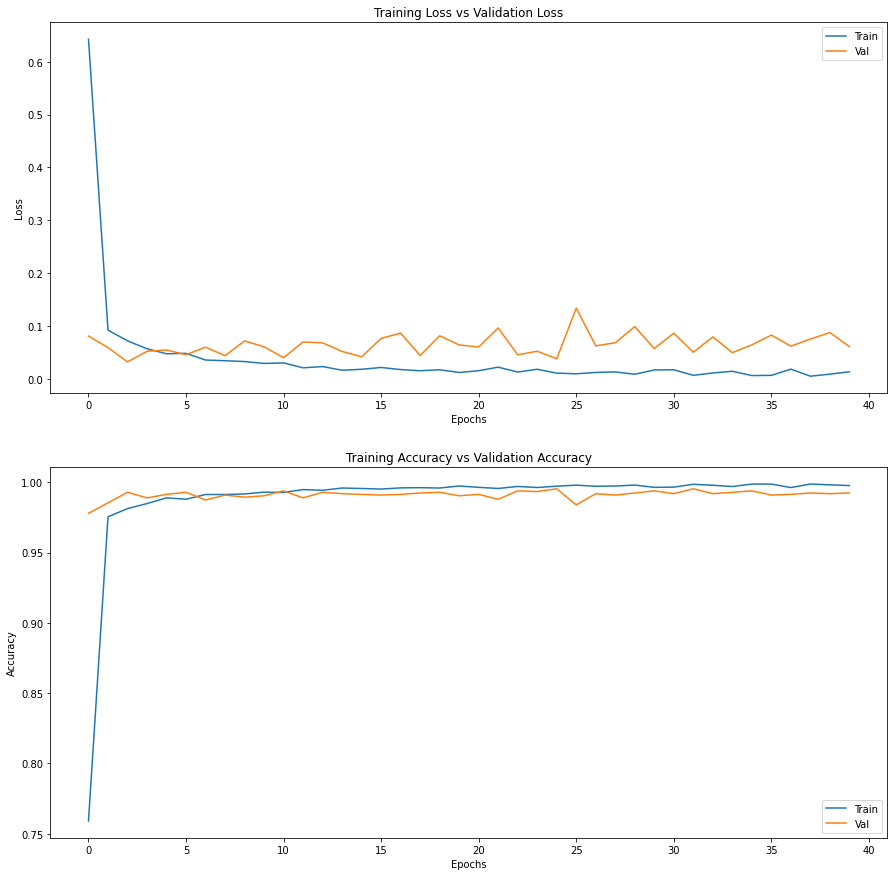

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])